# UNAD
## Ruben Dario Gallego Tellez
## Predicción de la Calidad del Vino Tinto con Arboles de Decisión
## Pasos de la actividad

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [348]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estádisticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# Librerías para implementar modelos de ciencias de datos

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mutual_info_score
from sklearn.preprocessing import StandardScaler

In [13]:
# Librerías para implementar modelos de ciencias de datos

Datos=pd.read_csv('C:/unad/ArbolDecision.csv')

In [15]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [19]:
# Información de las Filas y Columnas

Datos.shape

(1599, 12)

In [21]:
# Descripción de los datos

Datos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [27]:
# Información del conjunto de Datos
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB



Visualización de histogramas:


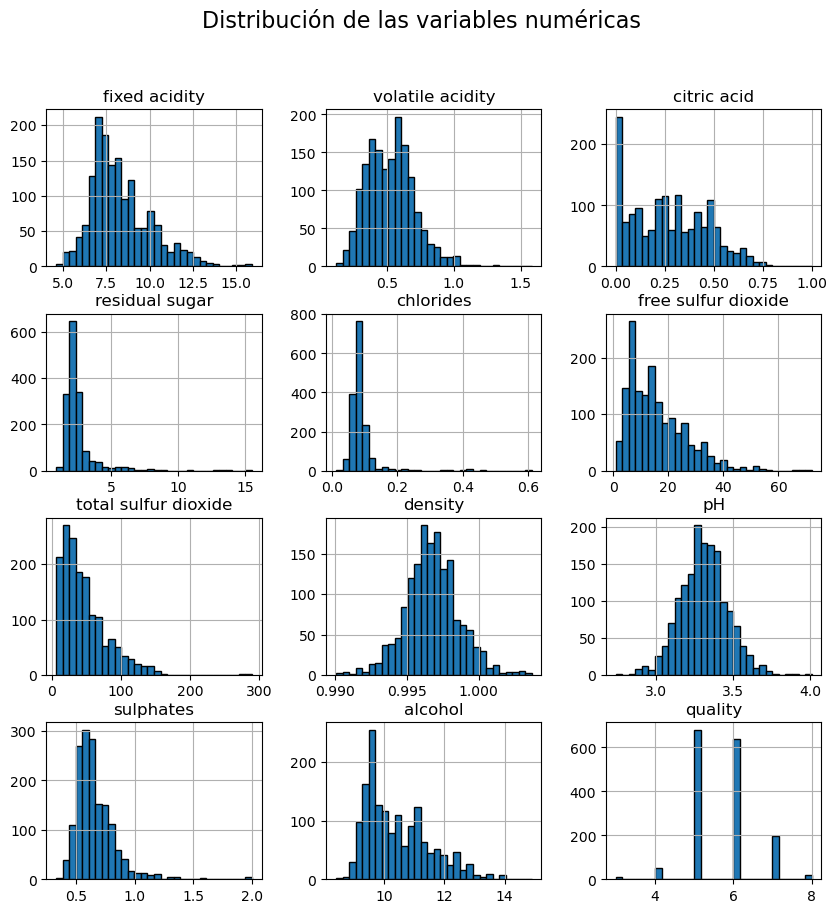

In [237]:
# visualización de distribuaciones - Histogramas

print("\nVisualización de histogramas:")
Datos.hist(figsize=(10,10), bins=30, edgecolor='Black')
plt.suptitle("Distribución de las variables numéricas", fontsize=16)
plt.show()


Gráfico de dispersión entre variables Alcohol y Quality:


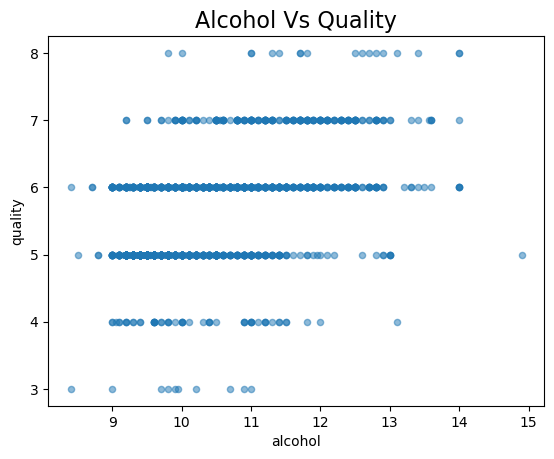

In [41]:
# Visualización de relaciones entre varaibles numéricas - Gráfico de dispersión

print("\nGráfico de dispersión entre variables Alcohol y Quality:")
Datos.plot(kind='scatter', x='alcohol', y='quality', alpha=0.5)
plt.title("Alcohol Vs Quality", fontsize=16)
plt.show()


Matriz de correlación:


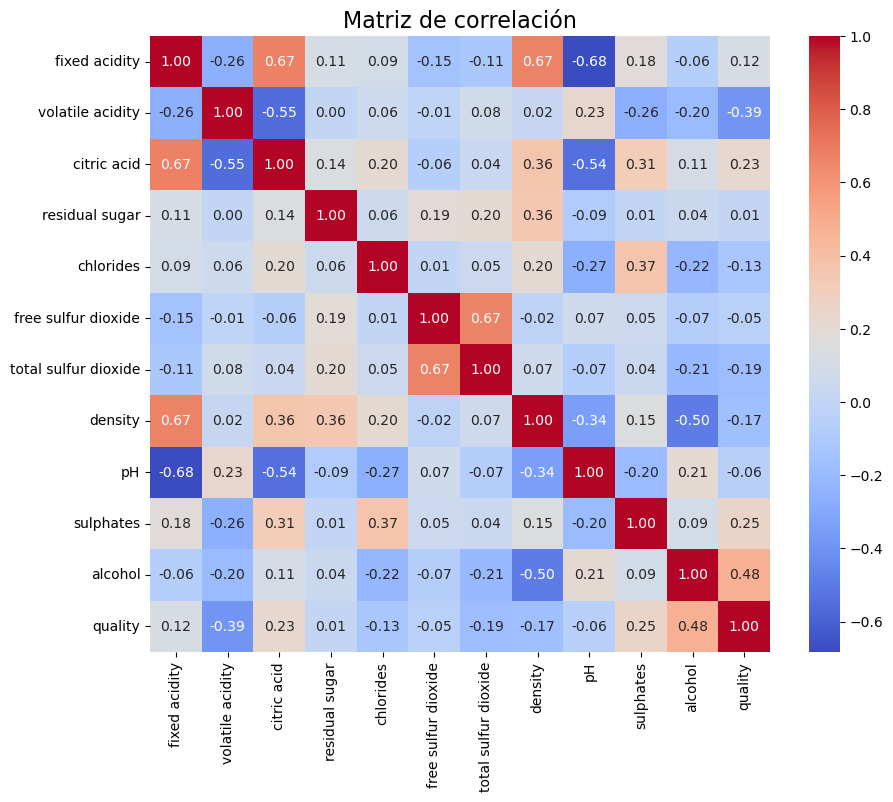

In [47]:
# Matriz de correlación y mapa de Calor

print("\nMatriz de correlación:")
correlation_matrix = Datos.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f")
plt.title("Matriz de correlación",fontsize=16)
plt.show()


Visualización de gráficos de caja:


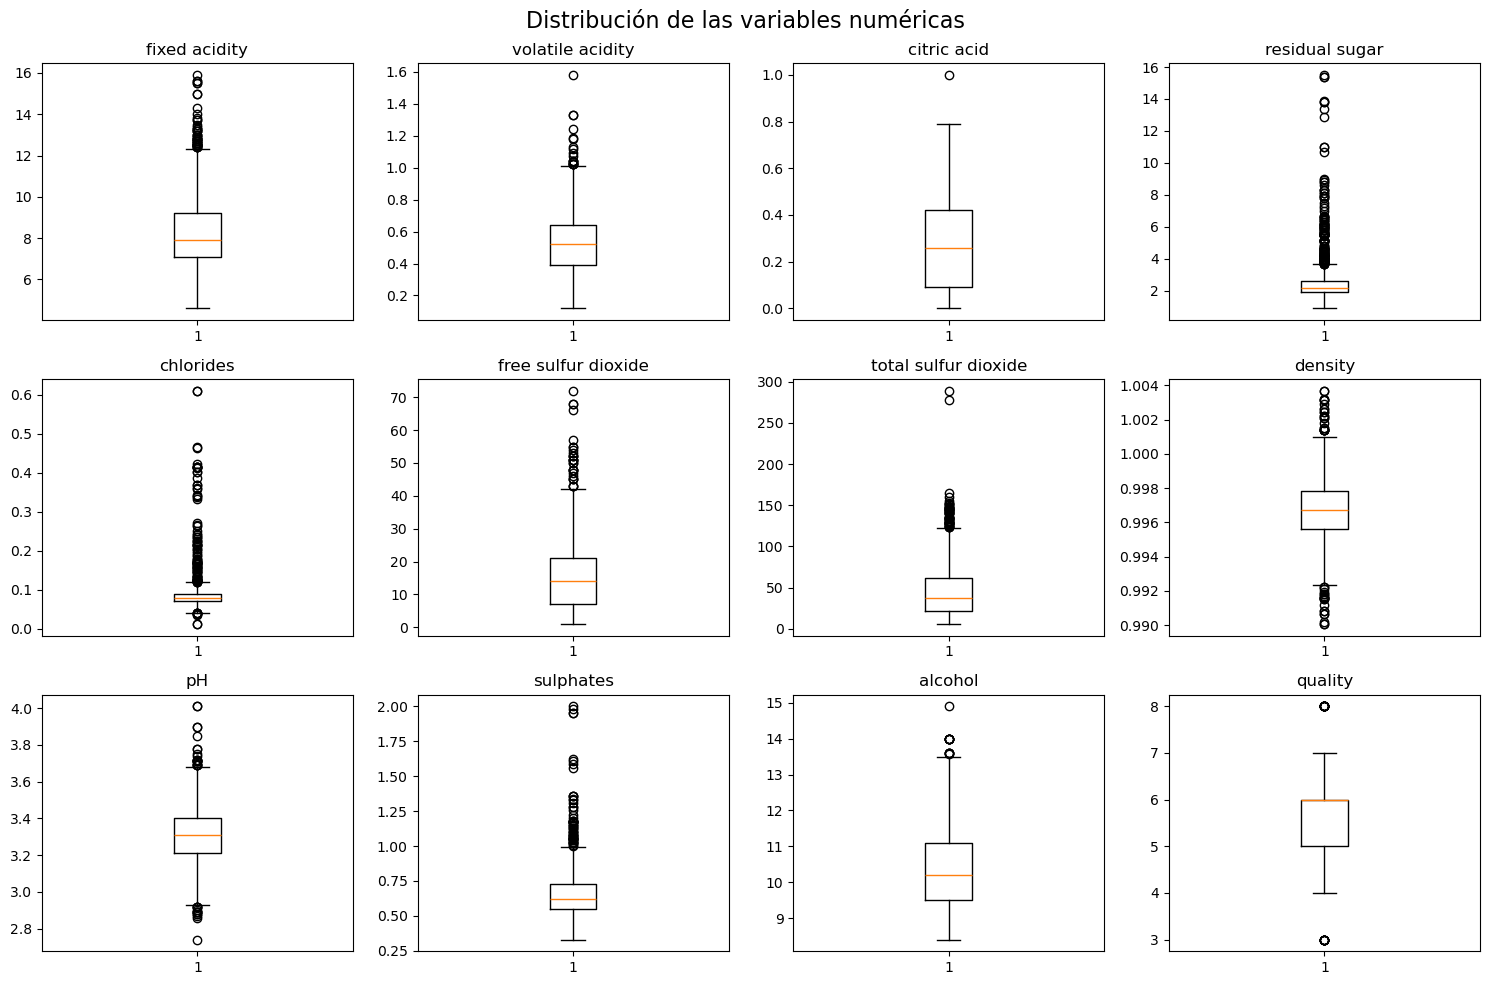

In [294]:
# visualización de gráficos de caja

print("\nVisualización de gráficos de caja:")
dato0=Datos['fixed acidity']
dato1=Datos['volatile acidity']
dato2=Datos['citric acid']
dato3=Datos['residual sugar']
dato4=Datos['chlorides']
dato5=Datos['free sulfur dioxide']
dato6=Datos['total sulfur dioxide']
dato7=Datos['density']
dato8=Datos['pH']
dato9=Datos['sulphates']
dato10=Datos['alcohol']
dato11=Datos['quality']
# Crear subplots
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
# Plots Boxplot del dato0
axs[0,0].boxplot(dato0)
axs[0,0].set_title('fixed acidity')
#axs[0,0].set_xlabel('Sample')
#axs[0,0].set_ylabel('Value')
# Plots Boxplot del dato1
axs[0,1].boxplot(dato1)
axs[0,1].set_title('volatile acidity')
#axs[0,1].set_xlabel('Sample')
#axs[0,1].set_ylabel('Value')
# Plots Boxplot del dato2
axs[0,2].boxplot(dato2)
axs[0,2].set_title('citric acid')
#axs[0,2].set_xlabel('Sample')
#axs[0,2].set_ylabel('Value')
# Plots Boxplot del dato3
axs[0,3].boxplot(dato3)
axs[0,3].set_title('residual sugar')
#axs[0,3].set_xlabel('Sample')
#axs[0,3].set_ylabel('Value')
# Plots Boxplot del dato4
axs[1,0].boxplot(dato4)
axs[1,0].set_title('chlorides')
#axs[1,0].set_xlabel('Sample')
#axs[1,0].set_ylabel('Value')
# Plots Boxplot del dato5
axs[1,1].boxplot(dato5)
axs[1,1].set_title('free sulfur dioxide')
#axs[1,1].set_xlabel('Sample')
#axs[1,1].set_ylabel('Value')
# Plots Boxplot del dato6
axs[1,2].boxplot(dato6)
axs[1,2].set_title('total sulfur dioxide')
#axs[1,2].set_xlabel('Sample')
#axs[1,2].set_ylabel('Value')
# Plots Boxplot del dato7
axs[1,3].boxplot(dato7)
axs[1,3].set_title('density')
#axs[1,3].set_xlabel('Sample')
#axs[1,3].set_ylabel('Value')
# Plots Boxplot del dato8
axs[2,0].boxplot(dato8)
axs[2,0].set_title('pH')
#axs[2,0].set_xlabel('Sample')
#axs[2,0].set_ylabel('Value')
# Plots Boxplot del dato9
axs[2,1].boxplot(dato9)
axs[2,1].set_title('sulphates')
#axs[2,1].set_xlabel('Sample')
#axs[2,1].set_ylabel('Value')
# Plots Boxplot del dato10
axs[2,2].boxplot(dato10)
axs[2,2].set_title('alcohol')
#axs[2,2].set_xlabel('Sample')
#axs[2,2].set_ylabel('Value')
# Plots Boxplot del dato11
axs[2,3].boxplot(dato11)
axs[2,3].set_title('quality')
#axs[2,3].set_xlabel('Sample')
#axs[2,3].set_ylabel('Value')
plt.suptitle("Distribución de las variables numéricas", fontsize=16)
plt.tight_layout()
plt.show()

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea nacesario.

In [302]:
# Valores faltantes
Datos.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [314]:
# Usamos el rango intercuartílico (IQR) para identficar valores atípicos

Q1=Datos.quantile(0.25)
Q3=Datos.quantile(0.75)
IQR=Q3-Q1

In [322]:
# Filtramos las filas que tienen valores atípicos en cualquiera de las columnas numéricas

Datos_Clean=Datos[~((Datos<(Q1-1.5*IQR))|(Datos>(Q3+1.5*IQR))).any(axis=1)]

print(f"Número de filas después de eliminar outliers: {Datos_Clean.shape[0]}")

Número de filas después de eliminar outliers: 1179


In [332]:
# Normalización de las variables numéricas

scaler=StandardScaler()

# Normalizamos todas las variables exepto "quality"

features=Datos_Clean.drop('quality',axis=1)
Datos_Scaled=pd.DataFrame(scaler.fit_transform(features),columns=features.columns)

In [334]:
# Añadir de nuevo la columna de "quality" sin normalizar

Datos_Scaled['quality']=Datos_Clean['quality'].values

In [338]:
# Transformación de la variable objetivo "quality" de la siguiente manera, podriamos categorizar la calidad en baja (<=5), media (6) y alta (>=7)

Datos_Scaled['quality_category']=pd.cut(Datos_Scaled['quality'],bins=[2,5,6,8], labels=['Baja','Media','Alta'])

In [342]:
# Verificamos el dataset limpio y preprocesado

print(Datos_Scaled.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.522760          1.077803    -1.375744       -0.647508  -0.180706   
1      -0.248346          2.174284    -1.375744        0.940570   1.356569   
2      -0.248346          1.443297    -1.152735        0.259965   0.937312   
3       2.084173         -1.480652     1.746386       -0.647508  -0.250582   
4      -0.522760          1.077803    -1.375744       -0.647508  -0.180706   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.457421             -0.316839  0.763633  1.407839  -0.614084   
1             1.135446              0.947754  0.135771 -0.946440   0.419963   
2            -0.002316              0.449581  0.261343 -0.490773   0.161451   
3             0.225236              0.679507  0.889206 -1.250217  -0.441743   
4            -0.457421             -0.316839  0.763633  1.407839  -0.614084   

    alcohol  quality quality_category  
0 -0.986764     

In [475]:
Datos_Scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179 entries, 0 to 1178
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1179 non-null   float64 
 1   volatile acidity      1179 non-null   float64 
 2   citric acid           1179 non-null   float64 
 3   residual sugar        1179 non-null   float64 
 4   chlorides             1179 non-null   float64 
 5   free sulfur dioxide   1179 non-null   float64 
 6   total sulfur dioxide  1179 non-null   float64 
 7   density               1179 non-null   float64 
 8   pH                    1179 non-null   float64 
 9   sulphates             1179 non-null   float64 
 10  alcohol               1179 non-null   float64 
 11  quality               1179 non-null   int64   
 12  quality_category      1179 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 111.9 KB


In [504]:
Datos_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1179 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1179 non-null   float64
 1   volatile acidity      1179 non-null   float64
 2   citric acid           1179 non-null   float64
 3   residual sugar        1179 non-null   float64
 4   chlorides             1179 non-null   float64
 5   free sulfur dioxide   1179 non-null   float64
 6   total sulfur dioxide  1179 non-null   float64
 7   density               1179 non-null   float64
 8   pH                    1179 non-null   float64
 9   sulphates             1179 non-null   float64
 10  alcohol               1179 non-null   float64
 11  quality               1179 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 119.7 KB


In [506]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1179 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1179 non-null   float64
 1   volatile acidity      1179 non-null   float64
 2   citric acid           1179 non-null   float64
 3   residual sugar        1179 non-null   float64
 4   chlorides             1179 non-null   float64
 5   free sulfur dioxide   1179 non-null   float64
 6   total sulfur dioxide  1179 non-null   float64
 7   density               1179 non-null   float64
 8   pH                    1179 non-null   float64
 9   sulphates             1179 non-null   float64
 10  alcohol               1179 non-null   float64
dtypes: float64(11)
memory usage: 110.5 KB


In [477]:
predictors_col = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide",
                  "density", "pH", "sulphates", "alcohol", "quality"]
target_col = ['quality_category']

In [479]:
predictors = Datos_Scaled[predictors_col]
target = Datos_Scaled[target_col]

In [481]:
predictors

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.522760,1.077803,-1.375744,-0.647508,-0.180706,-0.457421,-0.316839,0.763633,1.407839,-0.614084,-0.986764,5
1,-0.248346,2.174284,-1.375744,0.940570,1.356569,1.135446,0.947754,0.135771,-0.946440,0.419963,-0.571630,5
2,-0.248346,1.443297,-1.152735,0.259965,0.937312,-0.002316,0.449581,0.261343,-0.490773,0.161451,-0.571630,5
3,2.084173,-1.480652,1.746386,-0.647508,-0.250582,0.225236,0.679507,0.889206,-1.250217,-0.441743,-0.571630,6
4,-0.522760,1.077803,-1.375744,-0.647508,-0.180706,-0.457421,-0.316839,0.763633,1.407839,-0.614084,-0.986764,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1174,-1.346002,0.468647,-0.929726,-0.420639,0.797560,1.931879,0.066371,-1.057168,0.952172,-0.441743,0.154854,5
1175,-1.551812,0.164069,-0.818221,0.033097,-1.158972,2.728312,0.334618,-0.919038,1.483784,1.109327,0.881338,6
1176,-1.277398,-0.079593,-0.650964,0.259965,-0.180706,1.590550,-0.086913,-0.529764,0.724339,1.023156,0.673771,6
1177,-1.551812,0.742767,-0.706716,-0.420639,-0.250582,1.931879,0.066371,-0.699287,1.863506,0.678474,-0.156497,5


In [483]:

target

,quality_category
0,Baja
1,Baja
2,Baja
3,Media
4,Baja
...,...
1174,Baja
1175,Media
1176,Media
1177,Baja


In [485]:
corr = predictors.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.271010,0.659397,0.229653,0.197774,-0.150845,-0.087083,0.610125,-0.684378,0.165367,-0.037999,0.113422
volatile acidity,-0.271010,1.000000,-0.627194,0.035215,0.117805,-0.016718,0.097487,0.044174,0.220702,-0.317346,-0.220600,-0.346962
citric acid,0.659397,-0.627194,1.000000,0.149494,0.073031,-0.068852,0.004660,0.305458,-0.470286,0.256747,0.137762,0.212133
residual sugar,0.229653,0.035215,0.149494,1.000000,0.232752,0.088405,0.199534,0.394732,-0.054684,0.040172,0.098175,0.007934
chlorides,0.197774,0.117805,0.073031,0.232752,1.000000,0.012326,0.176938,0.411902,-0.175758,-0.076853,-0.300750,-0.190869
free sulfur dioxide,-0.150845,-0.016718,-0.068852,0.088405,0.012326,1.000000,0.619675,-0.021505,0.149126,0.107455,-0.022415,-0.003609
total sulfur dioxide,-0.087083,0.097487,0.004660,0.199534,0.176938,0.619675,1.000000,0.149847,0.010031,-0.049655,-0.245125,-0.203374
density,0.610125,0.044174,0.305458,0.394732,0.411902,-0.021505,0.149847,1.000000,-0.227471,0.081691,-0.538901,-0.215375
pH,-0.684378,0.220702,-0.470286,-0.054684,-0.175758,0.149126,0.010031,-0.227471,1.000000,0.013972,0.126747,-0.060288
sulphates,0.165367,-0.317346,0.256747,0.040172,-0.076853,0.107455,-0.049655,0.081691,0.013972,1.000000,0.260783,0.413533


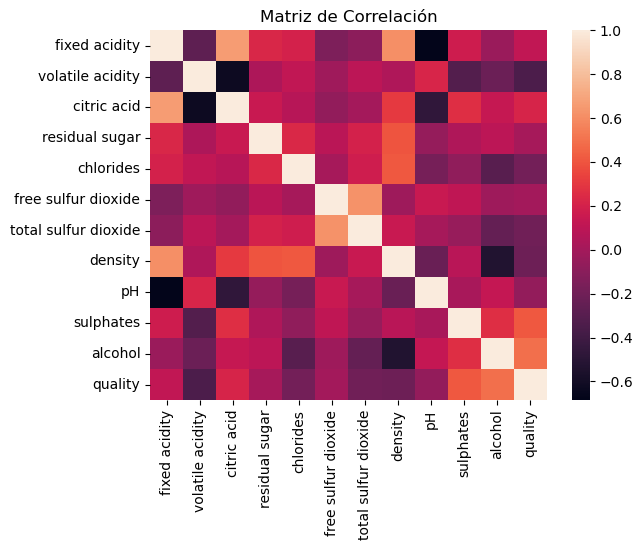

In [487]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [510]:
# Definir las características (x) y la variable objetivo (y)

x=Datos_Clean.drop(columns=['quality']) # Eliminar solo la columna "quality"
y=Datos_Scaled['quality_category']

In [576]:
print(x_train)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
872             7.3             0.350         0.24             2.0      0.067   
367            10.4             0.575         0.61             2.6      0.076   
768             7.1             0.590         0.02             2.3      0.082   
572            10.2             0.240         0.49             2.4      0.075   
1095            9.4             0.400         0.47             2.5      0.087   
...             ...               ...          ...             ...        ...   
1196            7.9             0.580         0.23             2.3      0.076   
0               7.4             0.700         0.00             1.9      0.076   
1508            7.1             0.270         0.60             2.1      0.074   
63              7.0             0.735         0.05             2.0      0.081   
1390            6.0             0.490         0.00             2.3      0.068   

      free sulfur dioxide  

In [578]:
print(x_test)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
454             7.0             0.230         0.40             1.6      0.063   
718             8.4             0.560         0.04             2.0      0.082   
85              6.9             0.550         0.15             2.2      0.076   
67              6.6             0.705         0.07             1.6      0.076   
570            11.5             0.350         0.49             3.3      0.070   
...             ...               ...          ...             ...        ...   
44              6.8             0.670         0.02             1.8      0.050   
602             7.7             0.835         0.00             2.6      0.081   
1311            6.5             0.510         0.15             3.0      0.064   
1556            6.6             0.880         0.04             2.2      0.066   
929             8.7             0.330         0.38             3.3      0.063   

      free sulfur dioxide  

In [512]:
# Importancia de las características con RandomForest

rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x,y)

# obtener la importancia de las carecterísticas

importances=rf.feature_importances_
indices=np.argsort(importances)[::-1]

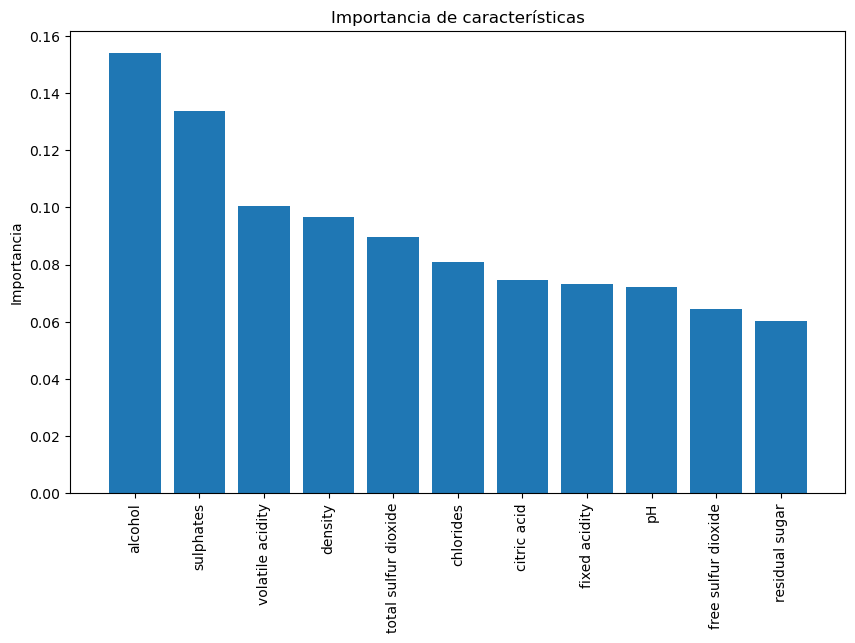

In [513]:
# Visualizar la importancia de las características

plt.figure(figsize=(10,6))
plt.title("Importancia de características")
plt.bar(range(x.shape[1]), importances[indices], align='center')
plt.xticks(range(x.shape[1]), x.columns[indices], rotation=90)
plt.xlim([-1, x.shape[1]])
plt.ylabel("Importancia")
plt.show()

## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [544]:
# Dividir el dataset en Train y Test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state= 0)

In [546]:
# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba

print(f'Dimensiones del conjunto de entrenamiento:{x_train.shape},{y_train.shape}')
print(f'Dimensiones del conjunto de prueba:{x_test.shape},{y_test.shape}')

Dimensiones del conjunto de entrenamiento:(884, 11),(884,)
Dimensiones del conjunto de prueba:(295, 11),(295,)


## 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [549]:
tree = DecisionTreeClassifier()

In [551]:
arbol = tree.fit(x_train, y_train)

[Text(0.42082801531589026, 0.9705882352941176, 'x[10] <= 9.85\ngini = 0.594\nsamples = 884\nvalue = [101, 409, 374]'),
 Text(0.1089661774090619, 0.9117647058823529, 'x[9] <= 0.575\ngini = 0.427\nsamples = 356\nvalue = [4, 249, 103]'),
 Text(0.2648970963624761, 0.9411764705882353, 'True  '),
 Text(0.028079132099553285, 0.8529411764705882, 'x[8] <= 3.54\ngini = 0.281\nsamples = 149\nvalue = [1, 124, 24]'),
 Text(0.02297383535417996, 0.7941176470588235, 'x[6] <= 9.5\ngini = 0.258\nsamples = 146\nvalue = [1, 124, 21]'),
 Text(0.017868538608806637, 0.7352941176470589, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.028079132099553285, 0.7352941176470589, 'x[10] <= 9.025\ngini = 0.241\nsamples = 144\nvalue = [1, 124, 19]'),
 Text(0.01021059349074665, 0.6764705882352942, 'x[3] <= 2.05\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.005105296745373325, 0.6176470588235294, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.015315890236119975, 0.6176470588235294, 'gini = 0.0\

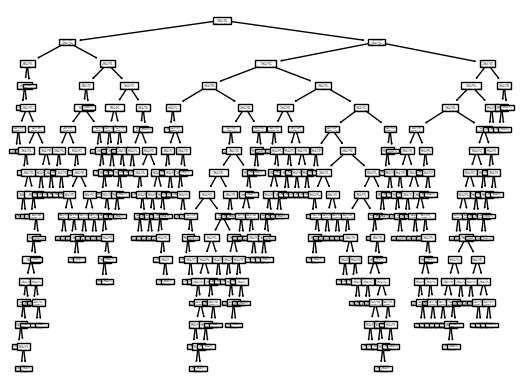

In [553]:
plot_tree(arbol)

In [554]:
predicciones = arbol.predict(x_test)

In [555]:
predicciones

array(['Media', 'Baja', 'Media', 'Media', 'Media', 'Media', 'Alta',
       'Baja', 'Baja', 'Baja', 'Media', 'Alta', 'Baja', 'Baja', 'Baja',
       'Baja', 'Baja', 'Media', 'Media', 'Media', 'Baja', 'Baja', 'Baja',
       'Baja', 'Baja', 'Media', 'Media', 'Baja', 'Baja', 'Media', 'Baja',
       'Baja', 'Media', 'Media', 'Baja', 'Baja', 'Baja', 'Baja', 'Media',
       'Alta', 'Baja', 'Alta', 'Alta', 'Media', 'Media', 'Media', 'Media',
       'Baja', 'Media', 'Baja', 'Media', 'Alta', 'Alta', 'Baja', 'Baja',
       'Alta', 'Baja', 'Media', 'Baja', 'Alta', 'Baja', 'Media', 'Baja',
       'Media', 'Baja', 'Media', 'Media', 'Media', 'Baja', 'Baja',
       'Media', 'Baja', 'Baja', 'Baja', 'Media', 'Baja', 'Baja', 'Alta',
       'Baja', 'Baja', 'Baja', 'Baja', 'Baja', 'Baja', 'Baja', 'Baja',
       'Baja', 'Alta', 'Baja', 'Media', 'Media', 'Media', 'Baja', 'Baja',
       'Media', 'Baja', 'Media', 'Baja', 'Media', 'Media', 'Alta',
       'Media', 'Baja', 'Media', 'Media', 'Alta', 'Media', 'Baja'

## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [562]:
# Examinamos la matriz de confusión

pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,Alta,Baja,Media
Actual,,,
A,21,6,7
B,3,104,30
M,16,32,76


In [563]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.6813559322033899

In [564]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

0.6833432483305413

In [565]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

0.6813559322033899

In [561]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.6812234717779008

## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

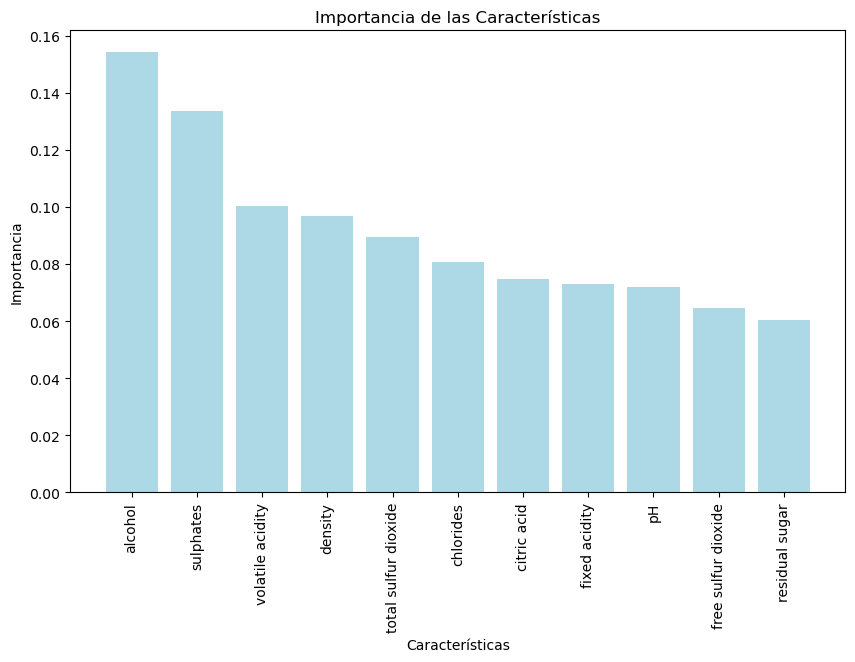

In [608]:
# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.title('Importancia de las Características')
plt.bar(range(x_train.shape[1]), importances[indices], align='center', color='lightblue')
plt.xticks(range(x_train.shape[1]), [x_train.columns[i] for i in indices], rotation=90)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.show()

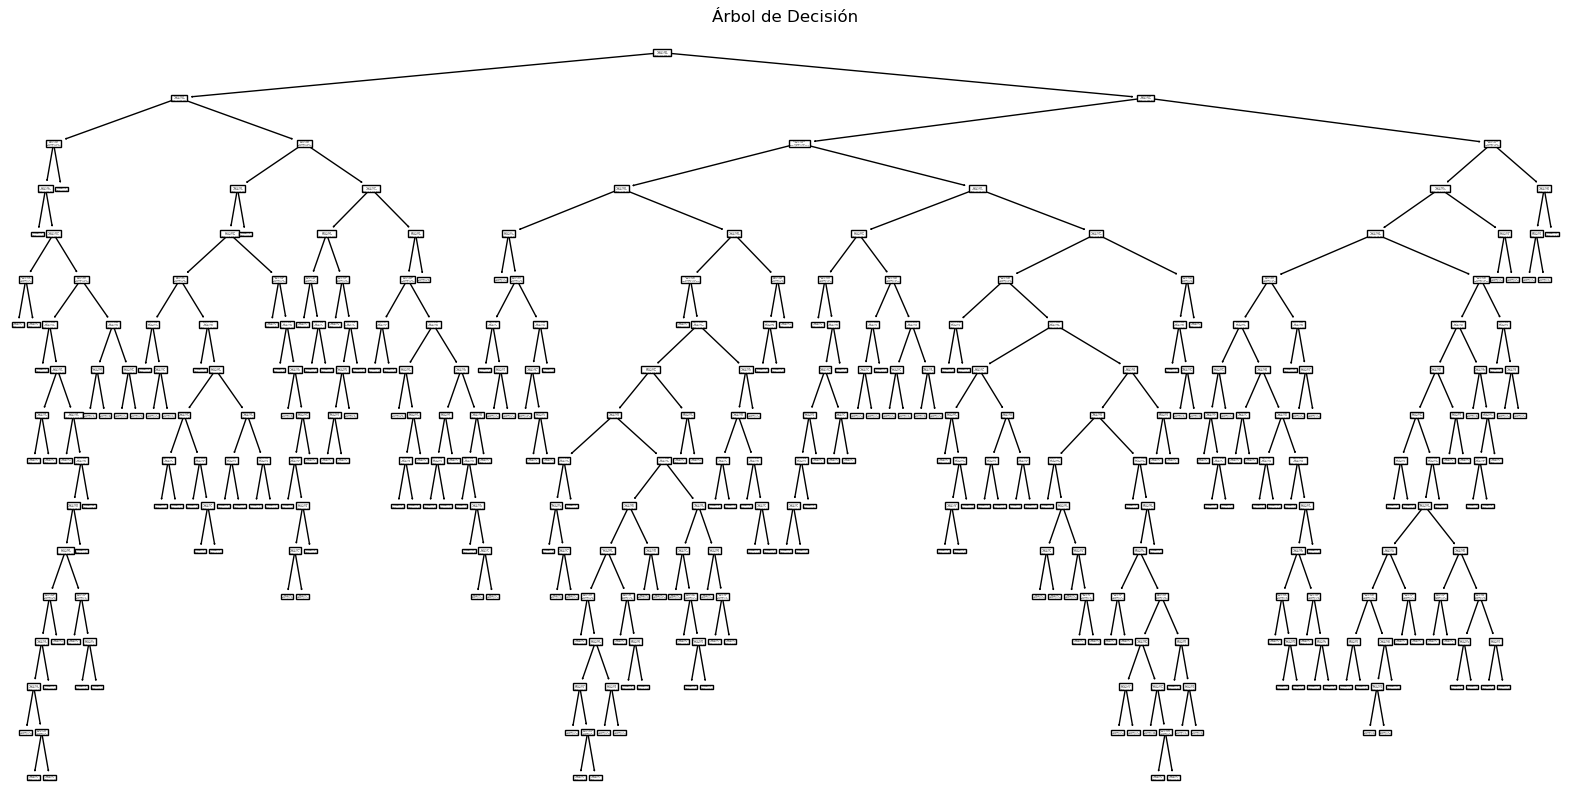

In [618]:
# Graficar el árbol de decisión completo
plt.figure(figsize=(20, 10))
plot_tree(arbol)
plt.title("Árbol de Decisión")
plt.show()